# Analisando os dados

## Análise usando os dados limpos (data_clean.csv)

In [2]:
import pandas as pd

df = pd.read_csv('../data/data_clean.csv')
# ficou da criacao de um novo .csv
df = df.drop(columns='Unnamed: 0')
df.shape

(200, 6)

Vamos gerar a coluna 'Total gasto', com Quantidade * Preço, para ver o total gasto em uma compra por item

In [3]:
df['Total gasto'] = df['Preço'] * df['Quantidade']
df.head(10)

,ID,Data,Produto,Categoria,Quantidade,Preço,Total gasto
0,155,2023-01-02,Bread roll,bread,8.0,1.5,12.0
1,43,2023-01-03,Pie slice,slice,10.0,4.0,40.0
2,111,2023-01-03,Pie slice,slice,4.0,4.0,16.0
3,5,2023-01-08,Veggie sandwich,sandwich,3.0,2.8,8.4
4,193,2023-01-13,Veggie sandwich,sandwich,1.0,2.8,2.8
5,1,2023-01-17,Bread loaf,bread,5.0,4.5,22.5
6,67,2023-01-17,Bread roll,bread,3.0,1.5,4.5
7,185,2023-01-17,Bread roll,bread,8.0,1.5,12.0
8,12,2023-01-18,Veggie sandwich,sandwich,2.0,2.8,5.6
9,154,2023-01-19,Mints,ready-made,3.0,1.0,3.0


Vejamos agora qual produto gerou mais receita (e retirar colunas que nao precisamos)

In [4]:
summed = df.groupby(['Produto']).sum().reset_index()
summed = summed[['Produto', 'Quantidade', 'Total gasto']]
summed['Preço'] = summed['Total gasto'] / summed['Quantidade']
display(summed)


,Produto,Quantidade,Total gasto,Preço
0,Bread loaf,109.0,490.5,4.5
1,Bread roll,166.0,249.0,1.5
2,Cake slice,149.0,521.5,3.5
3,Chicken sandwich,80.0,240.0,3.0
4,Chocolate bar,185.0,370.0,2.0
5,Mints,155.0,155.0,1.0
6,Pie slice,120.0,480.0,4.0
7,Veggie sandwich,124.0,347.2,2.8


In [5]:
summed.sort_values(by=['Total gasto'], inplace=True, ascending=False)
display(summed)

,Produto,Quantidade,Total gasto,Preço
2,Cake slice,149.0,521.5,3.5
0,Bread loaf,109.0,490.5,4.5
6,Pie slice,120.0,480.0,4.0
4,Chocolate bar,185.0,370.0,2.0
7,Veggie sandwich,124.0,347.2,2.8
1,Bread roll,166.0,249.0,1.5
3,Chicken sandwich,80.0,240.0,3.0
5,Mints,155.0,155.0,1.0


Podemos ver que o produto com maior número de vendas é **Veggie sandwich**, mas que o que mais gerou receita para a padaria foi **Cake slice**

## Geração de gráficos


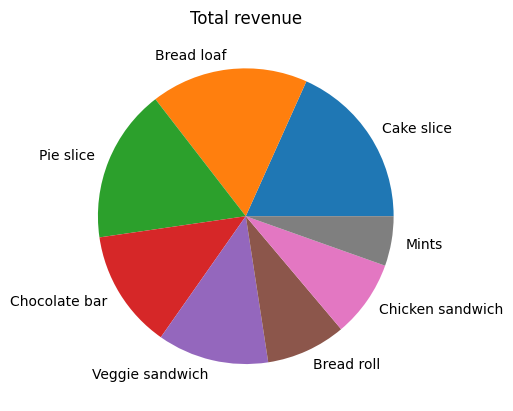

In [11]:
import numpy as np
import matplotlib.pyplot as plt

values = np.array(summed['Total gasto'])
labels = np.array(summed['Produto'])

fig, ax = plt.subplots()
ax.pie(values, labels=labels)

plt.title("Total revenue")

plt.savefig("../figures/revenue_pie.png")
plt.show()

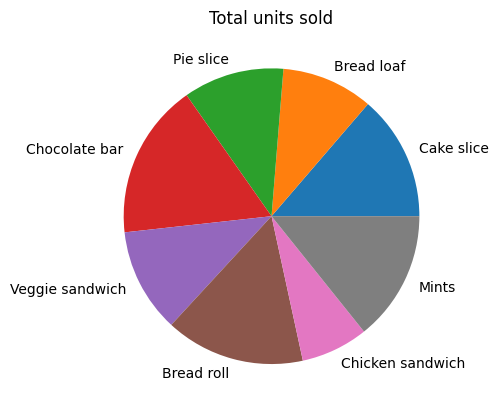

In [13]:
units = np.array(summed['Quantidade'])
labels = np.array(summed['Produto'])

fig, ax = plt.subplots()
ax.pie(units, labels=labels)

plt.title("Total units sold")

plt.savefig("../figures/units_sold_pie.png")
plt.show()

Percebe-se que os sanduíches não tiveram uma performance tão boa. Além disso, alguns dos itens que mais venderam, barra de chocolate e mentinhas, não geraram tanta receita por serem baratos.

Vamos gerar agora um gráfico indicando quantas vendas houveram por mês

In [41]:
dates = df.groupby(pd.Grouper(key='Data', freq='ME')).sum().reset_index()
dates.drop(columns=['ID', 'Produto', 'Categoria'], inplace=True)
display(dates)

,Data,Quantidade,Preço,Total gasto
0,2023-01-31,73.0,37.2,189.3
1,2023-02-28,59.0,37.8,173.3
2,2023-03-31,120.0,60.7,365.8
3,2023-04-30,41.0,25.1,135.0
4,2023-05-31,118.0,44.9,238.6
5,2023-06-30,104.0,44.9,261.5
6,2023-07-31,67.0,27.0,135.0
7,2023-08-31,161.0,78.6,427.5
8,2023-09-30,113.0,58.6,309.9
9,2023-10-31,96.0,43.1,238.3


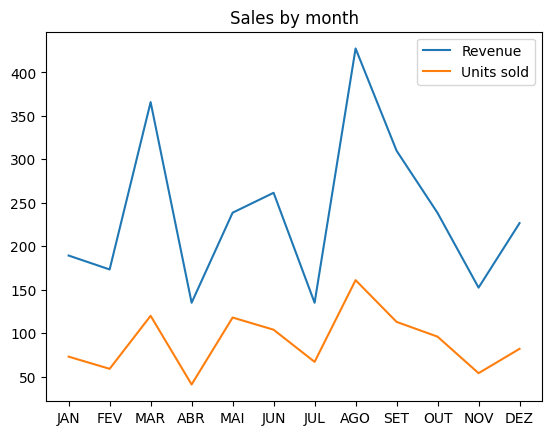

In [46]:
reven = np.array(dates['Total gasto'])
quant = np.array(dates['Quantidade'])
labels = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 
          'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

fig, ax = plt.subplots()
ax.plot(labels, reven, label='Revenue')
ax.plot(labels, quant, label='Units sold')

plt.title("Sales by month")

plt.savefig("../figures/monthly_sales.png")
ax.legend()
plt.show()

Vemos aqui que os meses de maior receita foram Março e Agosto, mas que as vendas não são constantes.